Synchronization point: 81
Total wrong received bits: 1377066
Total slices checked: 2881
BER:  0.47798195071155847


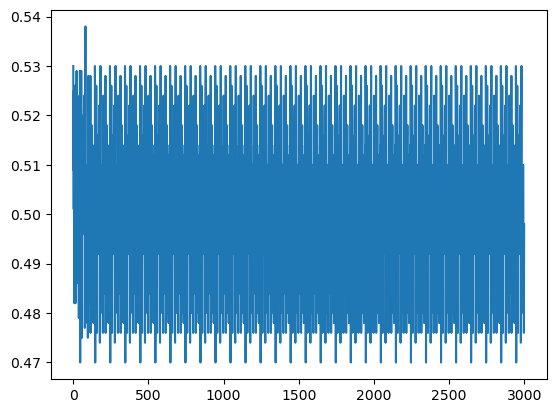

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def loadFile(fileRoute):
    with open(fileRoute, 'r') as file:
        data = file.read().replace('\n', '')  # Read new data and erase new lines
    arrayData = np.array([int(bit) for bit in data], dtype=np.int8)  # convert to numpy int array
    return arrayData

def slidingCorrelation(rxData, txData):
    n = len(txData)  # Longitud de la secuencia tx
    correlation = []  # Lista para almacenar las correlaciones
    # Iterar sobre la secuencia rx
    for i in range(3*n):
        # Extraer un segmento de datos_rx de tamaño igual a datos_tx
        rxSlice = rxData[i:i+n]
        # Calcular la correlación entre el segmento actual y datos_tx
        corrValue = np.sum(rxSlice == txData)/n
              
        # Añadir la correlación calculada a la lista
        correlation.append(corrValue)  # np.correlate devuelve un array, tomamos el primer valor
    return correlation  # Devolver la lista de correlaciones

def syncPoint(correlation):
    # Find max correlation value
    idxmaxCorr = np.argmax(correlation)
    return idxmaxCorr

def berCounting(rxData, txData, syncPoint):
    n = len(txData)  # Length Tx sequence
    bercount = 0  # BER counter
    k = 0  # Checking counter
    # Read Rx data from synchronizing point up to the end
    for i in range(syncPoint, len(rxData) - n, n):
        rxSlice = rxData[i:i+n]
        # Counting differences
        diff = np.sum(rxSlice != txData)
        bercount += diff
        k += 1  # Increase checking counter

    return bercount, k

# File name and route of Tx and Rx data
txFile = 'binarydata.txt'
rxFile = 'binarydataRx.txt'

# Read files and store values in numpy arrays
txData = loadFile(txFile)
rxData = loadFile(rxFile)

# Sliding correlation
correlation = slidingCorrelation(rxData, txData)

# Synchronization point
idxSyncPoint = syncPoint(correlation)
print("Synchronization point:", idxSyncPoint)

# BER counting from synchronization point up to the end
bercount, k = berCounting(rxData, txData, idxSyncPoint)
print("Total wrong received bits:", bercount)
print("Total slices checked:", k)

#BER calculation
ber = bercount/(k*len(txData))
print("BER: ",ber)
plt.plot(correlation)